### Install Libraries

In [12]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


View an image

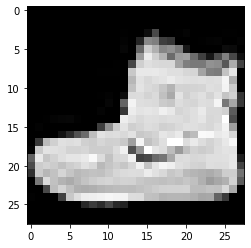

In [14]:
plt.imshow(x_train[0],cmap='gray')

### Normalize the pixel values between (0,1)
Current Pixel values lie between (0,255)

In [17]:
x_train = x_train/255
x_test = x_test/255

Check the size of Train and Test Images

In [20]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


60K images in Train and 10K images in Test set. Each image is of size 28 x 28 pixels

In [21]:
x_train.shape[1:]

(28, 28)

### Flatten the images 

In [22]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [23]:
x_train.shape

(60000, 784)

In [64]:
def Create_AutoEncoder(Data, reduced_dim = 20):
    """
    This function creates and returns an Auto Encoder
    
    Data: Original Data to be encode and Decoded
    reduced_dim: Number of Dimensions to reduce from Original Data 
    Returns: Auto Encoder Model
    
    """
#     Input Layer
    inputs = Input(shape=(Data.shape[1],))

    # Encoder layers
    encoded = Dense(128, activation='relu')(inputs)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
#   The original data is encoded to a reduced representation 
    encoded_output = Dense(reduced_dim, activation='relu')(encoded)

    # Decoder layers
    decoded = Dense(32, activation='relu')(encoded_output)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(128, activation='relu')(decoded)
#   The reduced features are scaled back to their original sizes
    decoded_output = Dense(Data.shape[1], activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(inputs, decoded_output)
    
    return autoencoder

In [59]:
def Train_AutoEncoder(Train, Test, Model = None, lr = 0.001, batch_size = 256, epochs = 50, shuffle = True):
    """
    This function trains the Auto Encoder
    Model: Auto Encoder Model
    Train: Train Set
    Test: Test Set
    lr: Learning Rate
    batch_size: Size of batch for each epoch
    epochs: Number of Iterations
    Shuffle: Boolean Flag of Shuffling training data
    
    Returns: Trained Auto Encoder Model
    
    """
    if Model is None:
        raise Exception('No Model Provided')
    
    Model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy')
    Model.fit(Train, Train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=shuffle,
                validation_data=(Test, Test))
    
    return Model

In [60]:
def predict(Test, Model = None):
    """
    This function returns the decoded/predicted Image after encoding of given image test set
    Model: Trained Auto Encoder Model
    Test: Original Test Set
    Returns: Decoded Images of Test Set
    
    """
    if Model is None:
        raise Exception('No Model Provided')
        
    encoded_imgs = Model.predict(Test)
    decoded_imgs = Model.predict(encoded_imgs)
    
    return decoded_imgs

In [79]:
def Display(Test, decoded_imgs, N = 10):
    """
    This function displays Original and Decoded Test Images to see the performance of Decoder
    
    Test: Originl Test Set
    decoded_imgs: Predicted/Decoded Images generated by Decoder
    N: Number of Images to display
    
    """
    plt.figure(figsize=(20, 4))
    
    for i in range(N):
        # Display original
        ax = plt.subplot(2, N, i + 1)
        plt.title('Original Image')
        plt.imshow(Test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, N, i + 1 + N)
        plt.title('Decoded Image')
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    

In [73]:
# Create Auto Encoder Model
AutoEncoder = Create_AutoEncoder(x_train, reduced_dim = 50)

In [74]:
# Train the model
Trained_Model = Train_AutoEncoder(x_train, x_test, Model = AutoEncoder, lr = 0.001, batch_size = 256, epochs = 100, shuffle = True)

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.3865 - val_loss: 0.3298
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3171 - val_loss: 0.3130
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3074 - val_loss: 0.3079
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3022 - val_loss: 0.3023
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2985 - val_loss: 0.2992
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2960 - val_loss: 0.2971
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2943 - val_loss: 0.2955
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2927 - val_loss: 0.2943
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2916 - val_loss: 0.2933
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2907 - val_l

235/235 [==============================] - 2s 10ms/step - loss: 0.2740 - val_loss: 0.2767
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2740 - val_loss: 0.2774
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2739 - val_loss: 0.2770
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2739 - val_loss: 0.2765
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2737 - val_loss: 0.2764
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2736 - val_loss: 0.2764
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2736 - val_loss: 0.2764
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2736 - val_loss: 0.2765
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2735 - val_loss: 0.2762
Epoch 90/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2735 - val

In [75]:
# Predict 
decoded_imgs = predict(x_test, Model = Trained_Model)

313/313 [==============================] - 1s 3ms/step


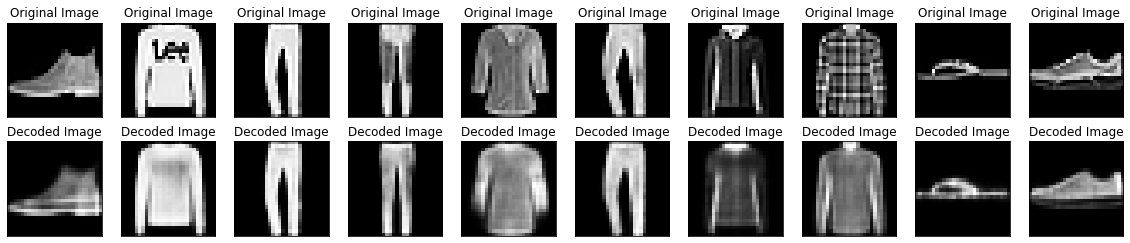

In [80]:
# Display the Decoded Images
Display(x_test, decoded_imgs, N = 10)